<!> INI ADALAH PROGRAM AUTOMATIC CLUSTERING (Kmeans)<!>

Masukkan nama data yang digunakan: ruspini
Masukkan banyak cluster yang diinginkan: 5

Kolom yang tersedia dalam dataset:
#
X
Y
CLASS
Masukkan kolom yang ingin di drop: #
Ingin mengulang?Cy
Masukkan kolom yang ingin di drop: CLASS
Ingin mengulang?t


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre


Kolom yang tersedia dalam dataset:
X
Y
Centroid Cluster 1: [79.         95.33333333]
Centroid Cluster 2: [68.93333333 19.4       ]
Centroid Cluster 3: [ 43.91304348 146.04347826]
Centroid Cluster 4: [20.15 64.95]
Centroid Cluster 5: [102.28571429 119.07142857]
Masukkan Nama kolom yang ingin divisualisasi: X
Masukkan Nama kolom yang ingin divisualisasi: Y
Number of Clusters  |  Variance Between  |  Variance Within
          1        |             0.00 |      244373.87
          2        |          2362.45 |       89337.83
          3        |          3038.09 |       51063.48
          4        |          2396.97 |       12881.05
          5        |           724.01 |       10126.72


/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

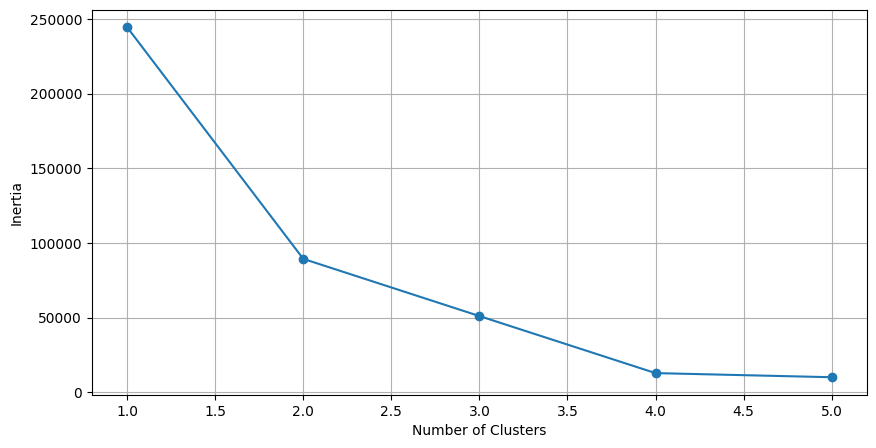

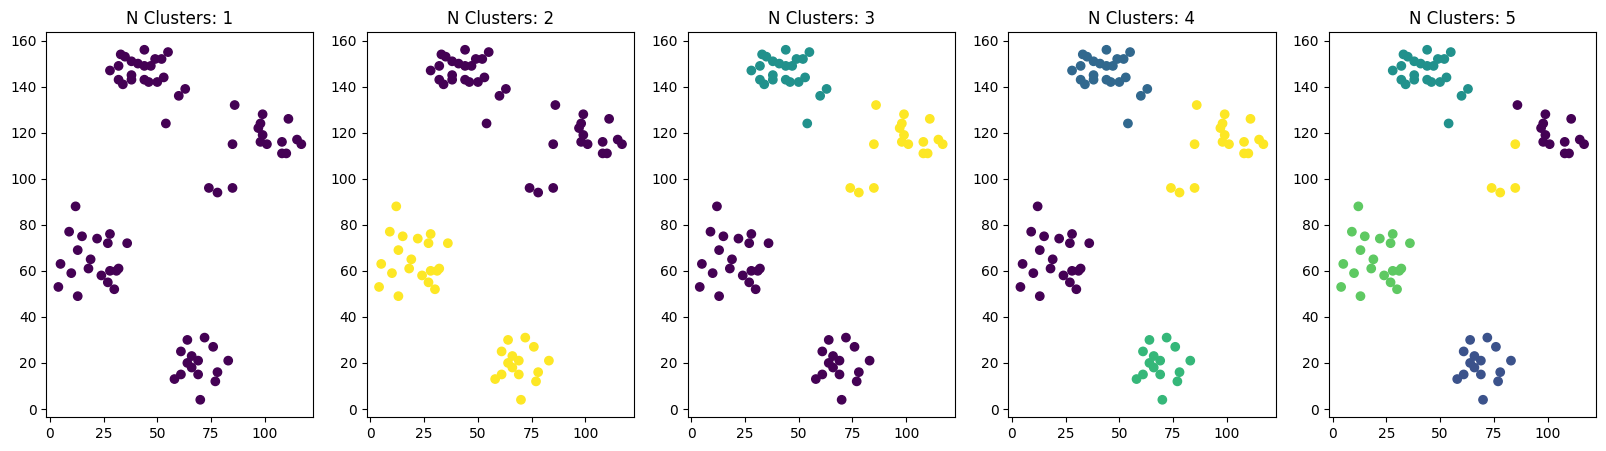

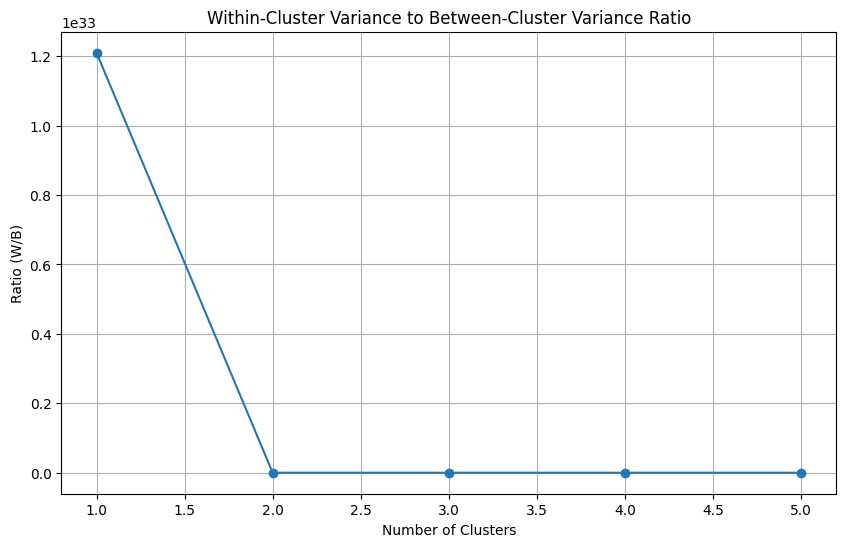

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

def kolomn(dataset):
    print("\nKolom yang tersedia dalam dataset:")
    for col in dataset.columns:
        print(col)
    
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k + 1): 
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, "o-")
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)

print("""<!> INI ADALAH PROGRAM AUTOMATIC CLUSTERING (Kmeans)<!>\n""")

data = str(input("Masukkan nama data yang digunakan: "))
k_cluster = int(input("Masukkan banyak cluster yang diinginkan: "))
     
dataset = pd.read_csv(data+".csv")
column = []
kolomn(dataset)
while True:
    kolom = input("Masukkan kolom yang ingin di drop: ")
    column.append(kolom)
    pilihan = input("Ingin mengulang?")
    if pilihan == 't':
        break
dataset = dataset.drop(columns=column) 
dataset = dataset.fillna(dataset.mean())
dataset = dataset.iloc[:,:]
var_bet = np.array(dataset) 
sc = StandardScaler()
var_df = dataset.iloc[:,:]
df = dataset.iloc[:,:]
df_tf = sc.fit_transform(df) 

kolomn(dataset)

optimise_k_means(df, k_cluster)
kmeans = KMeans(k_cluster)
kmeans.fit(df.iloc[:,:])
df[f'KMeans_{k_cluster}'] = kmeans.labels_

centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids, start=1):
    print(f"Centroid Cluster {i}: {centroid}")
    
for k in range (1,k_cluster+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(var_df)
    df[f'KMeans_{k}'] = kmeans.labels_
        
satu = input("Masukkan Nama kolom yang ingin divisualisasi: ")
dua = input("Masukkan Nama kolom yang ingin divisualisasi: ")
fig, axs = plt.subplots(nrows=1,ncols=k_cluster,figsize=(20,5))
for i, ax in enumerate(fig.axes,start=1):
    ax.scatter(x=df[satu], y=df[dua], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')
    
    # Calculate error, variance between, and variance within
errors = []
variance_between = []
variance_within = []

for k in range(1, k_cluster + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(var_df)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    error = 0
    for i in range(k):
        global_center = np.mean(var_df, axis=0)
        cluster_points = var_df[labels == i].iloc[:,:]
        error += ((cluster_points - cluster_centers[i]) ** 2).sum().sum()

# Hitung jarak antara pusat cluster dan pusat cluster global
        distances = np.linalg.norm(cluster_centers[i] - global_center, axis=0)          
# Kuadratkan jarak
        squared_distances = distances**2

    total_error = ((var_df - cluster_centers[labels]) ** 2).sum().sum()
    within_cluster_var = error
        
        # Hitung variance between clusters
    variance_between_clusters = np.sum(squared_distances)
    
    errors.append(total_error)
    variance_between.append(variance_between_clusters)
    variance_within.append(within_cluster_var)

    # Print the errors, variance between, and variance within
print("Number of Clusters  |  Variance Between  |  Variance Within")
for k in range(k_cluster):
    print(f"         {k+1:2d}        |  {variance_between[k]:15.2f} | {variance_within[k]:14.2f}")

# Hitung rasio within-cluster variance dibagi between-cluster variance
ratios = [variance_within[i] / variance_between[i] for i in range(k_cluster)]

# Jumlah cluster
cluster_numbers = list(range(1, k_cluster + 1))

# Visualisasi rasio
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, ratios, marker='o', linestyle='-')
plt.title('Within-Cluster Variance to Between-Cluster Variance Ratio')
plt.xlabel('Number of Clusters')
plt.ylabel('Ratio (W/B)')
plt.grid(True)
plt.show()
